In [1]:
import pandas as pd
from collections import OrderedDict
import requests

In [2]:
import boto3 
comprehend = boto3.client('comprehend', region_name='us-east-1')

In [4]:
df = pd.read_csv('Comprehend_Test.csv')
df.head()

,reviews.text
0,This product so far has not disappointed. My c...
1,great for beginner or experienced person. Boug...
2,Inexpensive tablet for him to use and learn on...
3,I've had my Fire HD 8 two weeks now and I love...
4,I bought this for my grand daughter when she c...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviews.text  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [7]:
reviews = []
sentiments = []
positive = []
negative = []
neutral = []

for i in range(len(df)):
    rev = df['reviews.text'][i]
    
    res = comprehend.detect_sentiment(Text=rev, LanguageCode='en')
    s = res.get('Sentiment')
    p = res.get('SentimentScore')['Positive']
    neg = res.get('SentimentScore')['Negative']
    neu = res.get('SentimentScore')['Neutral']
    
    reviews.append(rev)
    sentiments.append(s)
    positive.append(p)
    negative.append(neg)
    neutral.append(neu)
    


In [8]:
from collections import OrderedDict

result = pd.DataFrame(OrderedDict( {
            'reviews': reviews
         , 'sentiment': sentiments
         , 'positiveScore': positive
         , 'negativeScore': negative
         , 'neutralScore' : neutral
         }))

In [9]:
result.head()

,reviews,sentiment,positiveScore,negativeScore,neutralScore
0,This product so far has not disappointed. My c...,POSITIVE,0.999772,0.000060,0.000140
1,great for beginner or experienced person. Boug...,POSITIVE,0.999648,0.000030,0.000225
2,Inexpensive tablet for him to use and learn on...,POSITIVE,0.994858,0.000128,0.004978
3,I've had my Fire HD 8 two weeks now and I love...,POSITIVE,0.999498,0.000294,0.000074
4,I bought this for my grand daughter when she c...,POSITIVE,0.996598,0.000790,0.000720


In [10]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviews        1000 non-null   object 
 1   sentiment      1000 non-null   object 
 2   positiveScore  1000 non-null   float64
 3   negativeScore  1000 non-null   float64
 4   neutralScore   1000 non-null   float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [12]:
result['sentiment'].value_counts() 

POSITIVE    835
MIXED       113
NEGATIVE     44
NEUTRAL       8
Name: sentiment, dtype: int64

<AxesSubplot:>

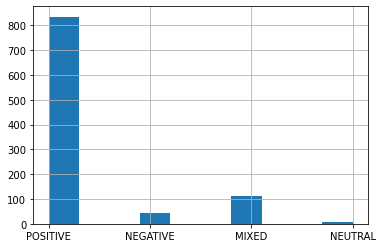

In [14]:
import matplotlib.pyplot as plt 
result['sentiment'].hist()

Finally, we can save the results in a comma separated file (CSV) 

In [16]:
result.to_csv('result.csv', index=False)